In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
X
y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [ ]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [ ]:
df.shape


(11162, 17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,28,8,2,2,0,5741,0,0,0,10,11,1042,5,200,3,0
11150,34,4,1,1,0,355,0,0,0,21,1,314,3,-1,0,3
5173,48,10,0,1,0,201,0,0,0,10,9,594,1,91,1,2
3017,53,2,1,2,0,1961,0,0,0,15,2,351,1,-1,0,3
2910,53,4,1,2,0,1624,0,0,0,11,9,166,3,97,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,4,1,2,0,761,1,0,0,11,5,80,2,-1,0,3
5191,28,6,2,2,0,159,0,0,0,16,9,449,2,33,4,2
5390,35,9,1,1,0,1144,0,0,0,20,1,197,13,-1,0,3
860,51,5,1,2,0,746,0,0,0,25,1,372,5,-1,0,3


In [ ]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5527,65,5,0,1,0,744,0,0,0,5,5,182,1,-1,0,3
4541,38,1,1,1,0,1627,0,0,2,16,6,1323,9,-1,0,3
1964,35,1,2,1,0,4963,1,0,0,14,8,456,1,300,1,0
5007,47,1,1,1,0,8229,0,0,0,8,1,784,2,-1,0,3
8928,35,9,1,2,0,1473,1,0,2,12,8,84,3,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,46,10,1,1,0,926,0,0,0,7,5,385,5,-1,0,3
5544,49,9,1,0,0,230,1,0,2,8,8,96,1,-1,0,3
10749,53,9,1,2,0,431,1,0,0,5,8,55,1,328,1,0
3881,48,10,1,1,0,926,0,0,0,12,1,504,2,178,10,2


In [ ]:
y_train
y_test

5527      no
4541     yes
1964     yes
5007     yes
8928      no
        ... 
376      yes
5544      no
10749     no
3881     yes
6786      no
Name: deposit, Length: 2233, dtype: object

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

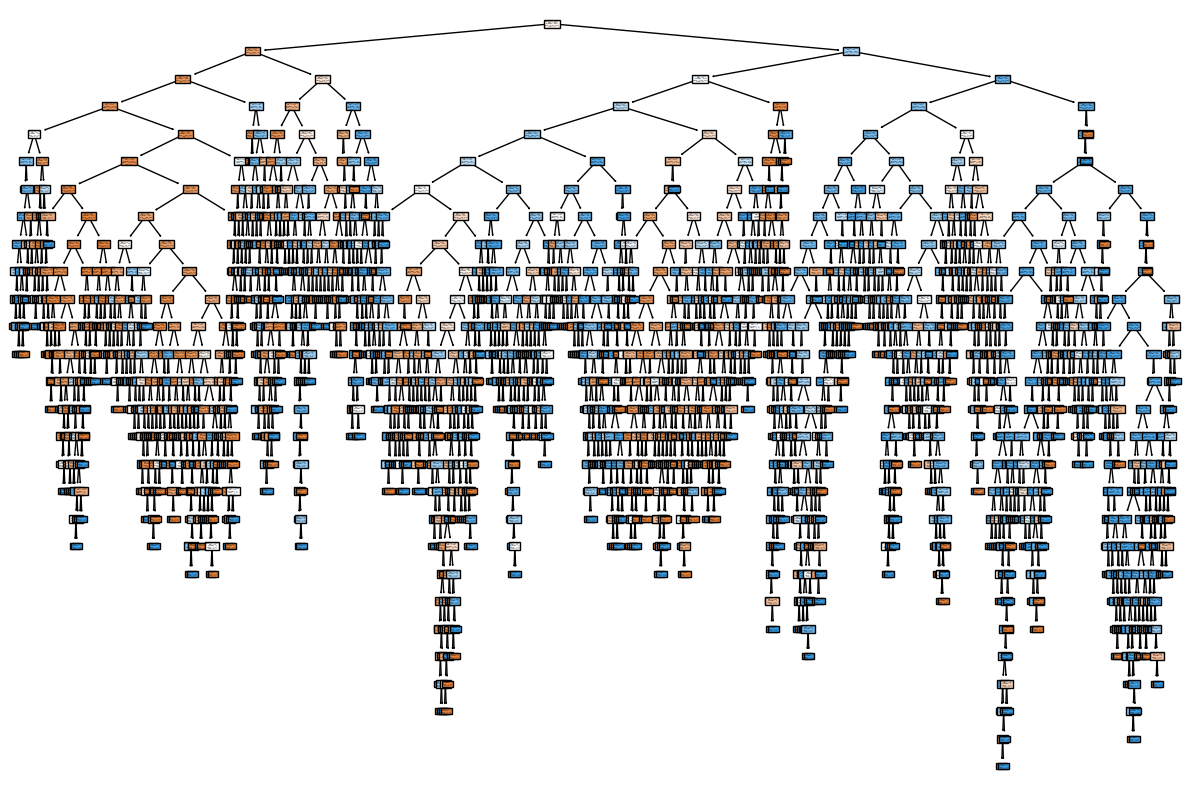

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()